<a href="https://colab.research.google.com/github/meghmodi2810/Machine-Learning-Projects/blob/main/Cat_vs_Dog_Classifier_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Model
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    with_info=True,
    as_supervised=True  # returns (image, label)
)

In [11]:
IMG_SIZE = 128

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return tf.cast(image, tf.float32) / 255., label

In [12]:
ds_train = ds_train.map(preprocess).batch(32)
ds_test = ds_test.map(preprocess).batch(32)

In [13]:
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(ds_train, epochs=5, validation_data=ds_test)

Epoch 1/5
582/582 [==============================] - 768s 1s/step - loss: 0.6004 - accuracy: 0.6645 - val_loss: 0.5005 - val_accuracy: 0.7571
Epoch 2/5
582/582 [==============================] - 742s 1s/step - loss: 0.4624 - accuracy: 0.7818 - val_loss: 0.4277 - val_accuracy: 0.8061
Epoch 3/5
582/582 [==============================] - 735s 1s/step - loss: 0.3839 - accuracy: 0.8266 - val_loss: 0.4087 - val_accuracy: 0.8186
Epoch 4/5
582/582 [==============================] - 737s 1s/step - loss: 0.3244 - accuracy: 0.8560 - val_loss: 0.4063 - val_accuracy: 0.8199
Epoch 5/5
582/582 [==============================] - 739s 1s/step - loss: 0.2567 - accuracy: 0.8909 - val_loss: 0.4491 - val_accuracy: 0.8181


In [17]:
loss, acc = model.evaluate(ds_test)
print(f"Test Accuracy: {acc:.2f}")

146/146 [==============================] - 58s 395ms/step - loss: 0.4491 - accuracy: 0.8181
Test Accuracy: 0.82


1/1 [==============================] - 0s 334ms/step


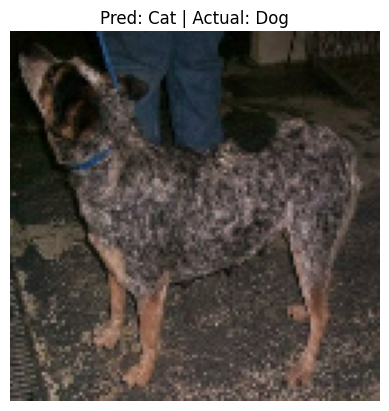

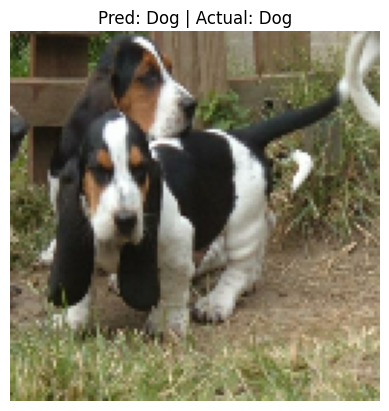

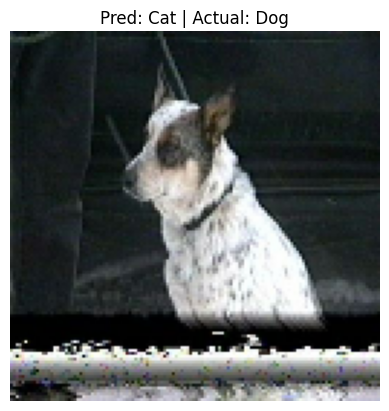

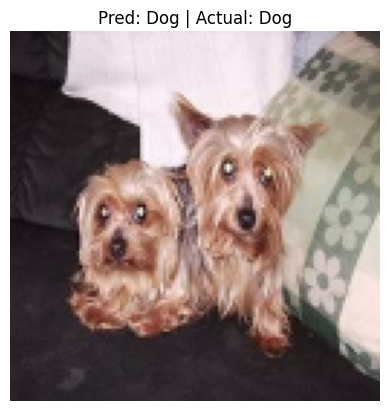

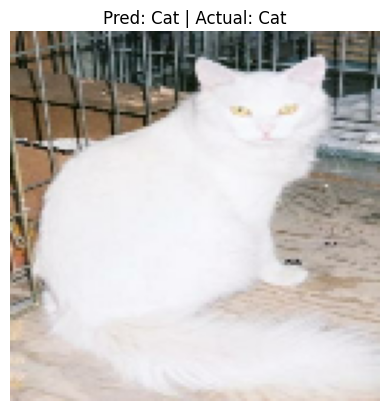

In [20]:
for image, label in ds_test.take(1):
    pred = model.predict(image)
    for i in range(5):
        plt.imshow(image[i])
        plt.title(f"Pred: {'Dog' if pred[i]>0.5 else 'Cat'} | Actual: {'Dog' if label[i]==1 else 'Cat'}")
        plt.axis("off")
        plt.show()
